In [1]:

from utils.data import Dataset

# Load dataset
dataset = Dataset(dataset_name='GYEONGGI9654')

data = dataset.dataloader.export_the_sequence(['Amount of Consumption'])

Reading data from: https://raw.githubusercontent.com/andrewlee1807/Weights/main/datasets/gyeonggi_univariable/9654_1hour.csv


# 1.Determine the Period of a Time Series with Fast Fourier Transform

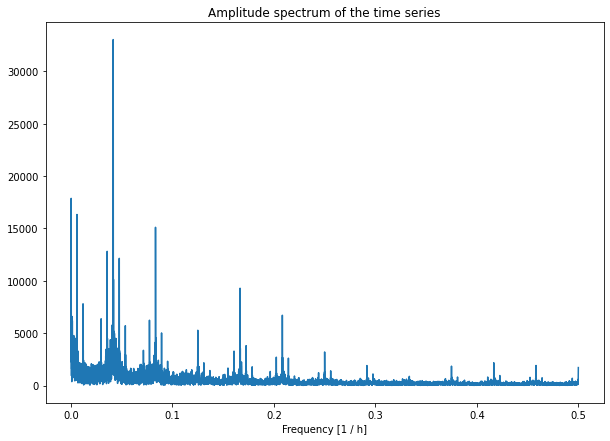

In [10]:
from scipy.fft import rfft, rfftfreq
import numpy as np
import matplotlib.pyplot as plt

nobs = len(data.squeeze())
temperature_ft = np.abs(rfft(data.squeeze()))
temperature_freq = rfftfreq(nobs)

plt.figure(figsize=(10, 7))
plt.plot(temperature_freq[2:], temperature_ft[2:])
#annot_max(temperature_freq[2:], temperature_ft[2:])
plt.title('Amplitude spectrum of the time series')
plt.xlabel('Frequency [1 / h]')
plt.show()

In [9]:
from scipy.fft import fft

# Calculate the Fourier transform
yf = np.fft.fft(data.squeeze())
xf = np.linspace(0.0, 1.0 / (2.0), len(data.squeeze()) // 2)

# Find the dominant frequency
# We have to drop the first element of the fft as it corresponds to the 
# DC component or the average value of the signal
idx = np.argmax(np.abs(yf[1:len(data.squeeze()) // 2]))
freq = xf[idx]

period = (1 / freq)
print(f"The period of the time series is {period}")
# The period of the time series is 24.031518624641837

The period of the time series is 24.031518624641837
